# Import the data from the CSV file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.formula.api as smf
from IPython.display import display

In [18]:
data = pd.read_csv('dormdata.csv')

data

,Dorm,URM,LGB,lessthaneightyk,fouryrgrad,sixyrgrad
0,Next,20.5,11.0,23.2,86.4,94.3
1,Baker,16.0,4.2,20.6,87.8,95.7
2,Burton,20.8,10.2,18.6,86.3,94.0
3,EC,19.2,38.0,24.9,75.3,89.4
4,MacGregor,27.2,8.3,28.2,80.9,92.2
5,Maseeh,21.4,6.4,23.3,87.2,NaN
6,McCormick,20.2,8.1,27.9,88.8,95.8
7,New,43.5,16.1,31.4,80.5,91.3
8,Random,17.2,40.8,35.5,71.6,88.0
9,Senior,36.7,40.0,30.9,59.7,78.1


In [4]:
print data["fouryrgrad"].std()
print data["sixyrgrad"].std()

8.84267544869
5.27300251807


# Plot the data

(0, 50)

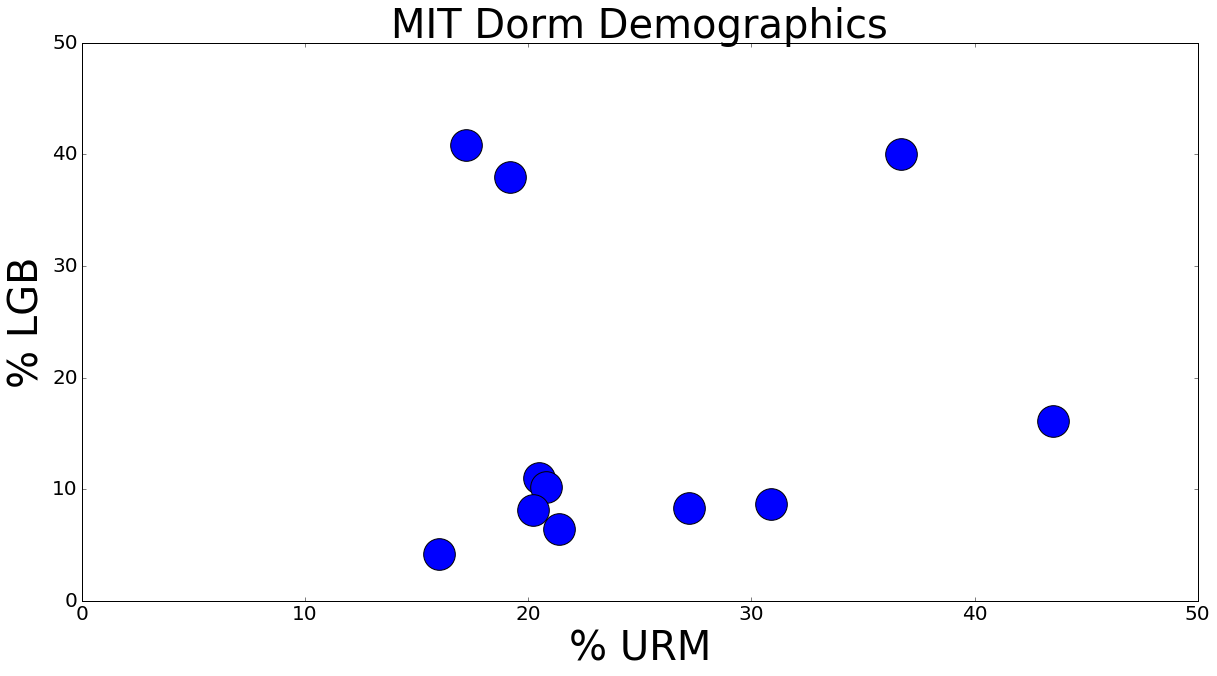

In [5]:
%matplotlib inline


plt.figure(figsize=(20,10))
plt.scatter(data.URM, data.LGB,s=1000)
plt.ylabel('% LGB',fontsize=40)
plt.xlabel('% URM',fontsize=40)
plt.title('MIT Dorm Demographics',fontsize=40)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([0,50])
plt.xlim([0,50])

# Run a multiple regression

In [23]:
reload(smf)

<module 'statsmodels.formula.api' from '/home/mirthbottle/anaconda/lib/python2.7/site-packages/statsmodels/formula/api.pyc'>

In [30]:
data6yr = data.dropna()

In [31]:
lm4 = smf.ols(formula='fouryrgrad ~ URM + LGB + lessthaneightyk', data=data, missing='drop').fit()
lm6 = smf.ols(formula='sixyrgrad ~ URM + LGB + lessthaneightyk', data=data6yr, missing='drop').fit()

In [32]:
display(lm4.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fouryrgrad   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     17.13
Date:                Tue, 04 Jul 2017   Prob (F-statistic):            0.00132
Time:                        15:07:49   Log-Likelihood:                -27.393
No. Observations:                  11   AIC:                             62.79
Df Residuals:                       7   BIC:                             64.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          96.9863      6.788     14.287      0.000        80.934   113.038
URM                -0.3188      0.151     -2.107      0.073        -0.677     0.039
LGB                -0.5252      0.100     -5.232      0.001        -0.763    -0.288
lessthaneightyk     0.0305      0.324      0.094      0.928        -0.736     0.797
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.275
Skew:                          -0.271   Prob(JB):                        0.872
Kurtosis:                       2.446   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
display(lm6.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sixyrgrad   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     9.653
Date:                Tue, 04 Jul 2017   Prob (F-statistic):             0.0103
Time:                        15:07:50   Log-Likelihood:                -21.477
No. Observations:                  10   AIC:                             50.95
Df Residuals:                       6   BIC:                             52.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          99.5284      5.052     19.699      0.000        87.166   111.891
URM                -0.2476      0.111     -2.231      0.067        -0.519     0.024
LGB                -0.3079      0.075     -4.132      0.006        -0.490    -0.126
lessthaneightyk     0.1360      0.237      0.573      0.587        -0.445     0.717
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.152
Skew:                          -0.287   Prob(JB):                        0.927
Kurtosis:                       2.813   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm6.predict(data6yr)

array([ 94.22244227,  97.07675347,  93.76870783,  86.46096478,
        94.07552983,  95.82918733,  88.07375545,  87.53594202,
        82.32915778,  92.92755923])

In [18]:
data.fouryrgrad.values

array([ 86.4,  87.8,  86.3,  75.3,  80.9,  87.2,  88.8,  80.5,  71.6,
        59.7,  83.3])

In [36]:
p4yr = pd.DataFrame(index=data.Dorm, data=lm4.predict(data), columns=["pred4yr"])
p6yr = pd.DataFrame(index=data6yr.Dorm, data=lm6.predict(data6yr), columns=["pred6yr"])

predicted = p4yr.join(p6yr).join(data.set_index("Dorm"))

In [42]:
predicted

,pred4yr,pred6yr,URM,LGB,lessthaneightyk,fouryrgrad,sixyrgrad
Dorm,,,,,,,
Next,85.381794,94.222442,20.5,11.0,23.2,86.4,94.3
Baker,90.308531,97.076753,16.0,4.2,20.6,87.8,95.7
Burton,85.565986,93.768708,20.8,10.2,18.6,86.3,94.0
EC,71.666707,86.460965,19.2,38.0,24.9,75.3,89.4
MacGregor,84.816731,94.075530,27.2,8.3,28.2,80.9,92.2
Maseeh,87.514035,NaN,21.4,6.4,23.3,87.2,NaN
McCormick,87.144025,95.829187,20.2,8.1,27.9,88.8,95.8
New,75.621562,88.073755,43.5,16.1,31.4,80.5,91.3
Random,71.157039,87.535942,17.2,40.8,35.5,71.6,88.0


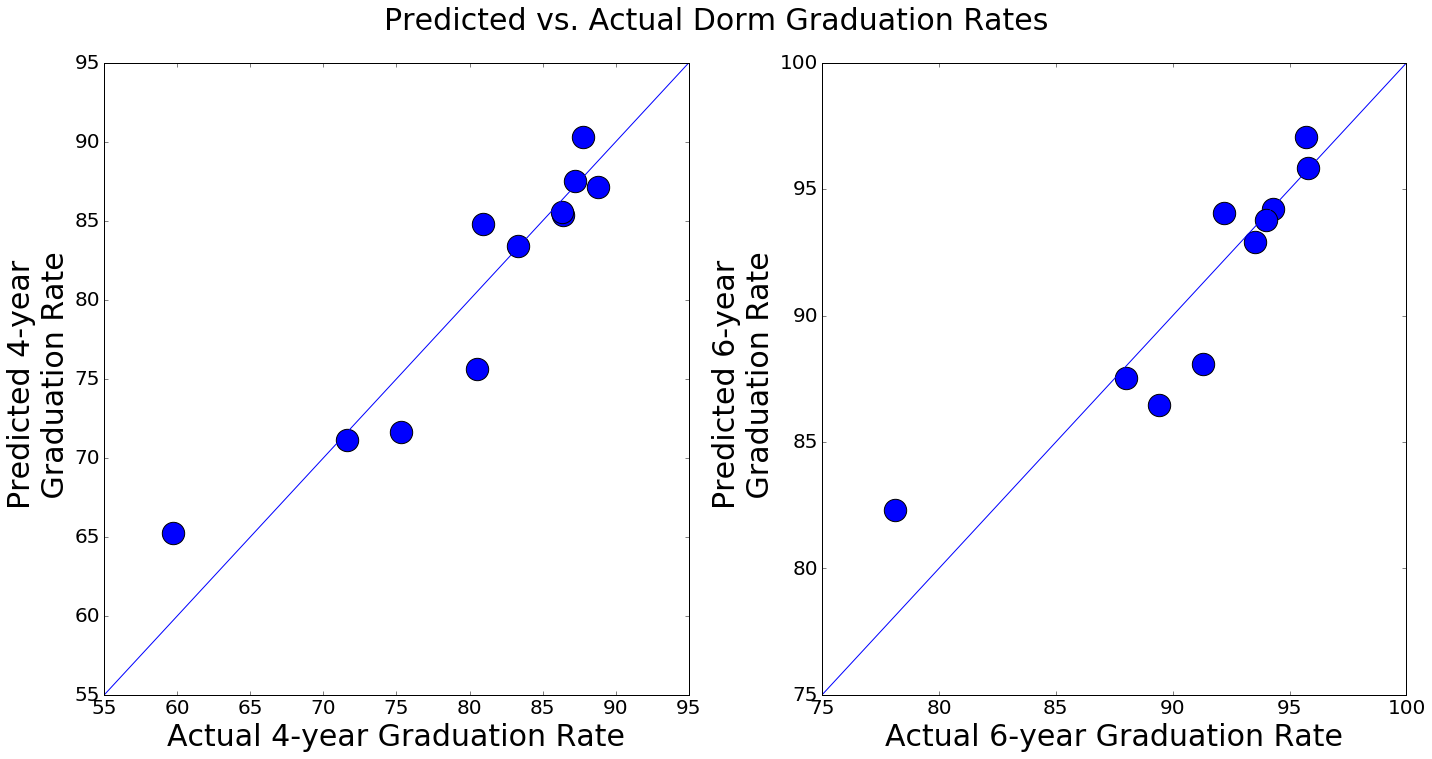

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(data.fouryrgrad,lm4.predict(data),s=500)
plt.plot(range(1,100),range(1,100))
plt.ylabel('Predicted 4-year \n Graduation Rate',fontsize=30)
plt.xlabel('Actual 4-year Graduation Rate',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([55,95])
plt.xlim([55,95])
plt.subplot(122)
plt.scatter(data6yr.sixyrgrad,lm6.predict(data6yr),s=500)
plt.plot(range(1,110),range(1,110))
plt.ylabel('Predicted 6-year \n Graduation Rate',fontsize=30)
plt.xlabel('Actual 6-year Graduation Rate',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim([75,100])
plt.xlim([75,100])
plt.suptitle('Predicted vs. Actual Dorm Graduation Rates\n\n\n',fontsize=30,y=1.05)
plt.tight_layout()

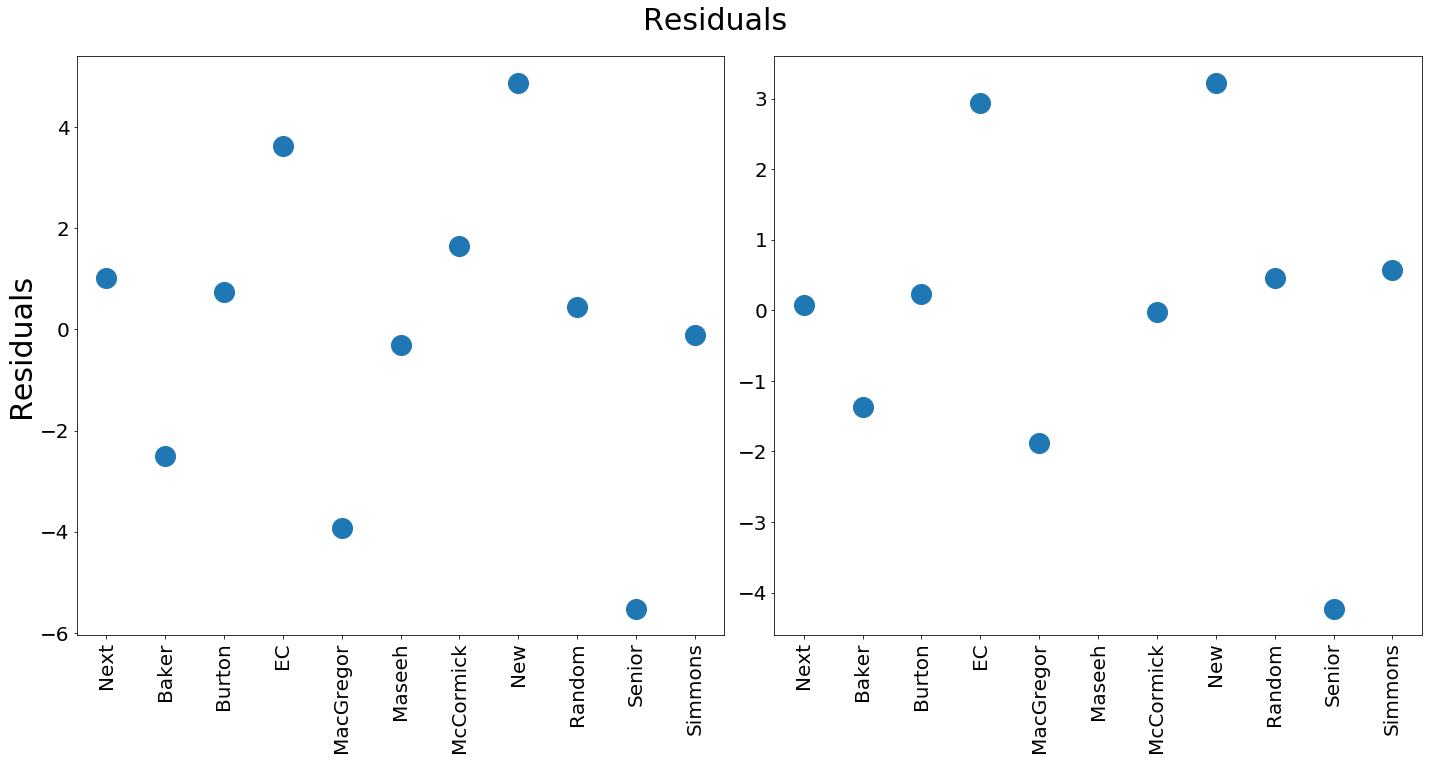

In [129]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(data.fouryrgrad - lm4.predict(data),'o',markersize=20)
plt.xticks(range(11),data.Dorm,rotation='vertical');
plt.ylabel('Residuals',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.subplot(122)
plt.plot(data.sixyrgrad - lm6.predict(data),'o',markersize=20)
plt.xticks(range(11),data.Dorm,rotation='vertical');
plt.tick_params(axis='both', which='major', labelsize=20)
plt.suptitle('Residuals\n\n\n',fontsize=30,y=1.05)
plt.tight_layout()

In [43]:
display(lm6.predict(data))

array([ 94.22244227,  97.07675347,  93.76870783,  86.46096478,
        94.07552983,  95.42980641,  95.82918733,  88.07375545,
        87.53594202,  82.32915778,  92.92755923])